IMPLEMETATION OF LOCAL OUTLIER FACTOR 

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("cleaned_data.xlsx", index_col="time")
df

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,
2017-01-01 00:00:00,0.749488,0.702192,0.537540,0.288208,0.615879,0.571836
2017-01-01 00:05:00,0.759509,0.707141,0.548025,0.292363,0.623519,0.563024
2017-01-01 00:10:00,0.756433,0.711013,0.554203,0.308848,0.626112,0.573868
2017-01-01 00:15:00,0.756097,0.710353,0.558449,0.300031,0.625958,0.578868
2017-01-01 00:20:00,0.770246,0.717474,0.560119,0.301201,0.633458,0.577567
...,...,...,...,...,...,...
2020-08-07 11:55:00,0.776949,0.708199,0.468054,0.263181,0.651788,0.505057
2020-08-07 12:00:00,0.760087,0.692321,0.460065,0.261588,0.634942,0.500970
2020-08-07 12:05:00,0.766393,0.692756,0.455899,0.258034,0.640261,0.495856


In [4]:
features = ['Cyclone_Inlet_Gas_Temp', 'Cyclone_Gas_Outlet_Temp', 'Cyclone_Outlet_Gas_draft',
'Cyclone_cone_draft', 'Cyclone_Inlet_Draft', 'Cyclone_Material_Temp']

lof = LocalOutlierFactor(n_neighbors=200, contamination = 'auto')

for i in features:
    outliers = lof.fit_predict(df[[i]])
    df[f'{i}_Anomaly'] = outliers
    # df[f'{i}_LOFscore'] = lof.negative_outlier_factor_
    # threshold = np.percentile(df[f'{i}_LOFscore'], 1)  
    # df[f'{i}_Anomaly'] = df[f'{i}_LOFscore'] < threshold  

df.columns

    

Index(['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft',
       'Cyclone_Inlet_Gas_Temp_Anomaly', 'Cyclone_Gas_Outlet_Temp_Anomaly',
       'Cyclone_Outlet_Gas_draft_Anomaly', 'Cyclone_cone_draft_Anomaly',
       'Cyclone_Inlet_Draft_Anomaly', 'Cyclone_Material_Temp_Anomaly'],
      dtype='object')

ANOMALY POINTS ARE MARKED WITH A RED 'X'
IT IS SEEN THAT THIS MODEL WORKS BETTER THAN ISOLATION FOREST 

C:\Users\hp\AppData\Local\Temp\ipykernel_2132\787684727.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


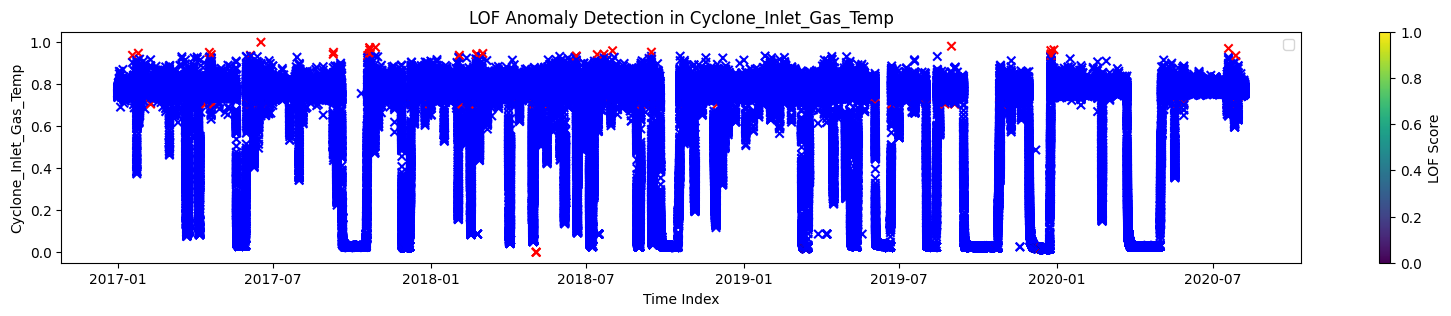

C:\Users\hp\AppData\Local\Temp\ipykernel_2132\787684727.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


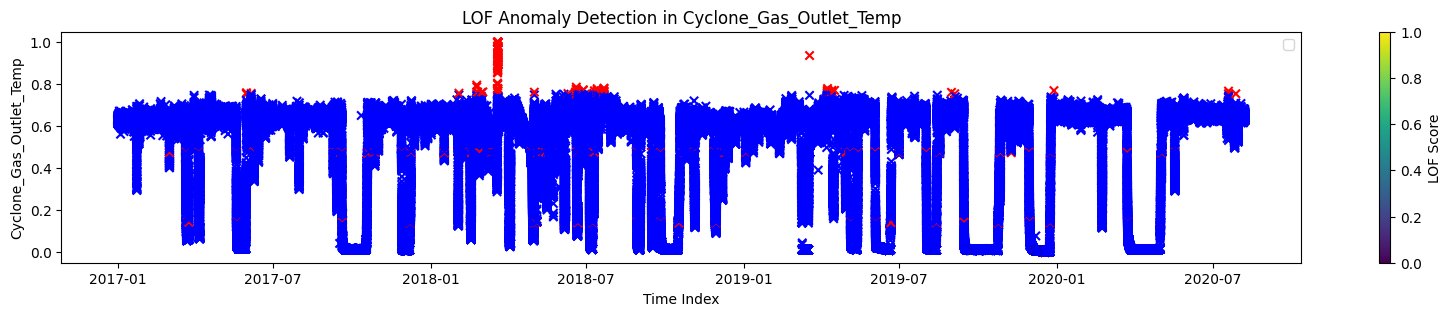

C:\Users\hp\AppData\Local\Temp\ipykernel_2132\787684727.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


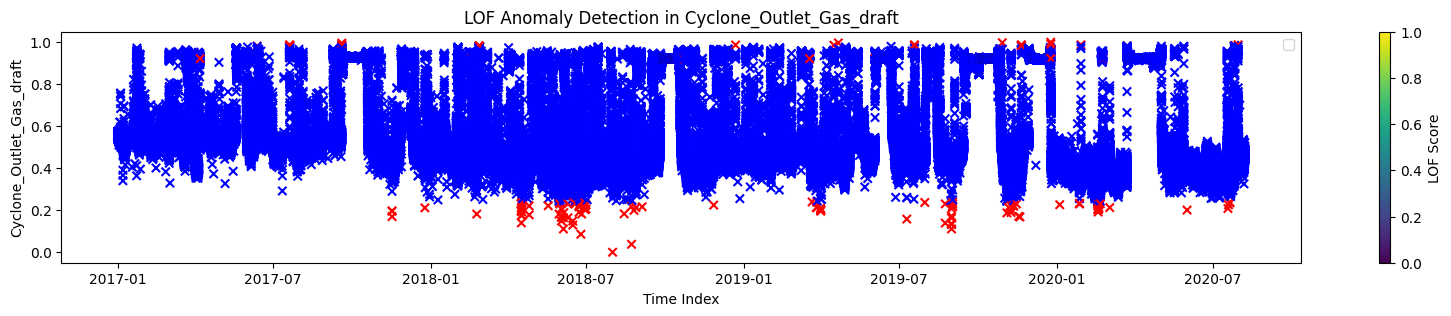

C:\Users\hp\AppData\Local\Temp\ipykernel_2132\787684727.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


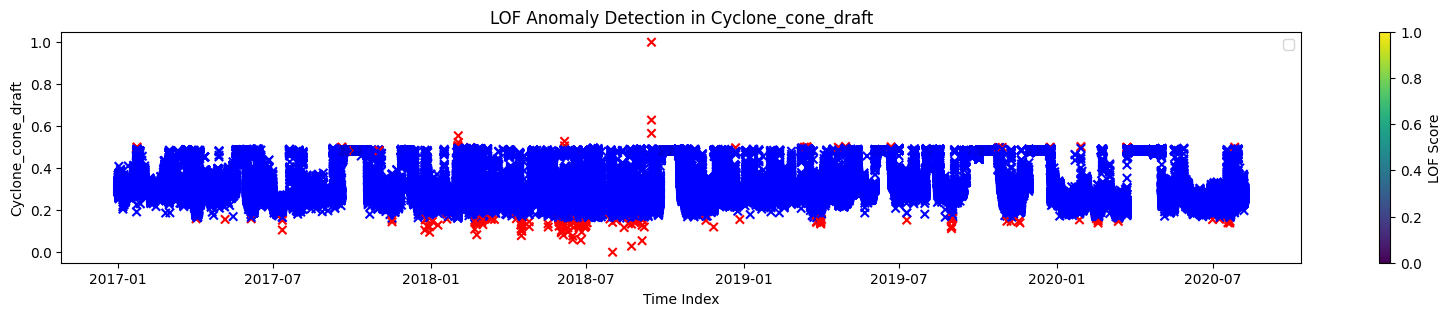

C:\Users\hp\AppData\Local\Temp\ipykernel_2132\787684727.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


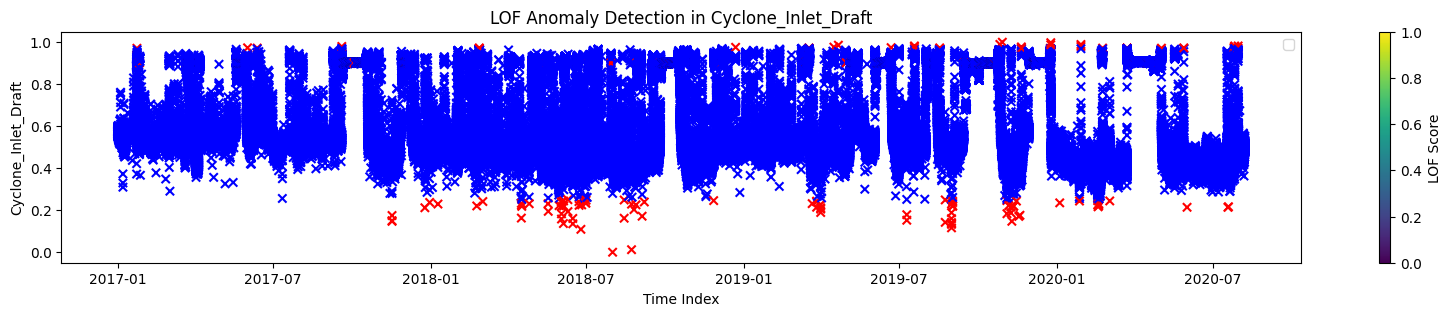

C:\Users\hp\AppData\Local\Temp\ipykernel_2132\787684727.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


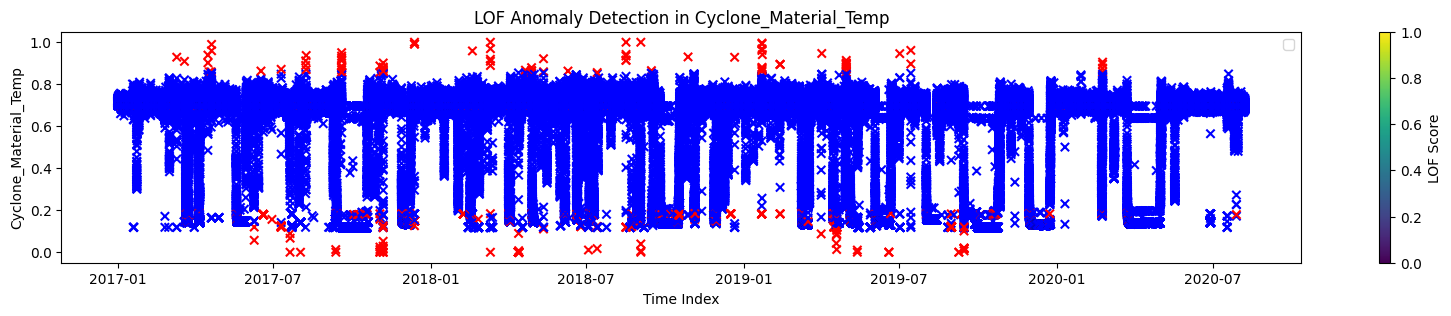

In [5]:
colors = {1: 'blue', -1: 'red'}

for i in features:    
    plt.figure(figsize=(20, 3))
    plt.scatter(df.index, df[i], c=df[f'{i}_Anomaly'].map(colors), marker='x')
    plt.colorbar(label='LOF Score')
    plt.xlabel('Time Index')
    plt.ylabel(f'{i}')
    plt.title(f'LOF Anomaly Detection in {i}')
    plt.legend()
    plt.show()